In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

The function stats.binom.pmf() calculates PMF for binomial distribution and takes three parameters:

1. Expected number of successful trails (5).
2. Total number of trails (20)
3. The probability of success (0.1)

In [2]:
stats.binom.pmf(5, 20, 0.1)

0.031921361119954424

In [9]:
stats.binom.pmf(2, 20, 0.1)

0.28517980706429846

The corresponding probability is 0.03192, that is, the probability that exactly 5 customers will return the items is approximately 3%.

Text(0, 0.5, 'pmf')

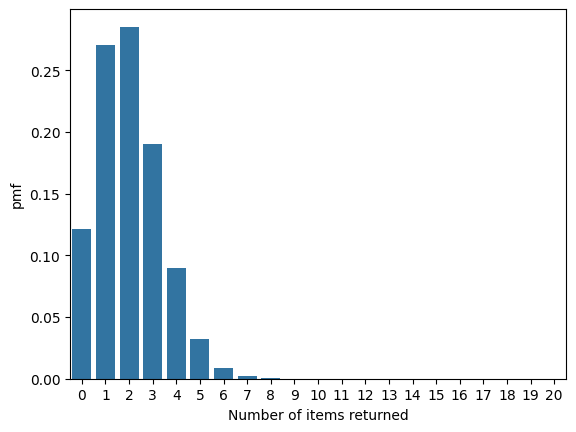

In [7]:
pmf_df = pd.DataFrame({'success': range(0, 21), 'pmf': list(stats.binom.pmf(range(0, 21), 20, 0.1))})
sns.barplot(x=pmf_df.success, y = pmf_df.pmf)
plt.xlabel('Number of items returned')
plt.ylabel('pmf')

#### The class stats.binom.cdf() computes the CDF for binomial distribution. In this case the cumulative distribution function returns the probability that a maximum of 5 customers will return items.

In [10]:
stats.binom.cdf(5, 20, 0.1)

0.988746865835491

Total probability of any number of customers returning items (including 0) is always equal to 1.0. So, the probability that more than 5 customers will return the items can be computed by subtracting the probability of a maximum of 5 customers will return items from 1.0. In other words, the probability that more than 5 customers will return the items can be obtained by computing CDF of 5 and then subtracting it from 1.0.

In [11]:
1 - stats.binom.cdf(5, 20, 0.1)

0.011253134164509015

- 4.  Average number of customers who are likely to return the items, the variance, and the standard deviation of the number of returns.
    
    (a) Average of a binomial distribution is given by n * p.  
    (b) Variance of the binomial distribution is given by n * p * (1 - p)

In [12]:
mean, var = stats.binom.stats(20, 0.1)
print(f"Average: {mean}, Variance: {var}")

Average: 2.0, Variance: 1.8


## Poission distribution

As the number of calls arriving at the center follows Poisson distribution, we can use stats.poisson.cdf to calculate the probability value. It takes the following two parameters:

<b>1. First parameter: Number of events (in this case, 5 calls) for which the probability needs to be calculated.  
2. Second parameter: The average numbers of events (i.e., 10 calls per hour).

In [13]:
stats.poisson.cdf(5, 10)

0.06708596287903189

Since the average calls per hour is 10 (𝛌 = 10), and we are interested in finding the calls over 3 hours, the mean number of calls over 3 hours is 
𝛌t = 30. Probability that the number of calls will be more than 30 is given by

In [14]:
1 - stats.poisson.cdf(30, 30)

0.45164848742208863

In [19]:
stats.poisson.cdf(9,10)

0.4579297144718523

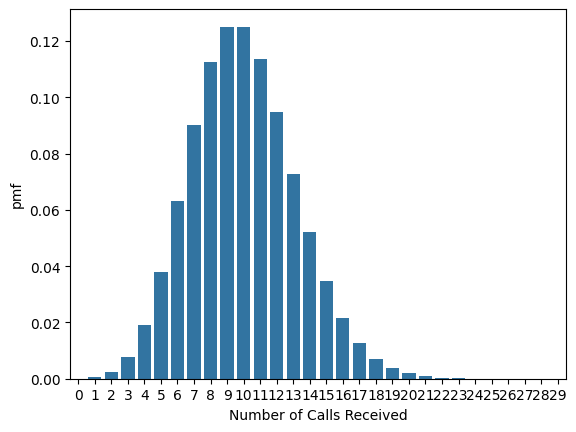

In [18]:
pmf_df = pd.DataFrame({ 'success': range(0,30), 'pmf': list(stats.poisson.pmf(range(0,30), 10))})
						
sns.barplot(x = pmf_df.success, y = pmf_df.pmf);
plt.xlabel('Number of Calls Received');

# Exponential Distribution 

The time-to-failure of an avionic system follows an exponential distribution with a mean time between failures (MTBF) of 1000 hours. Calculate

1. The probability that the system will fail before 1000 hours.
2. The probability that it will not fail up to 2000 hours.
3. The time by which 10% of the system will fail

Cumulative distribution up to value 1000 for the exponential distribution will give the probability that the system will fail before 1000 hours. stats.expon.cdf() takes the number of hours and mean and scale of the exponential distribution as parameters to calculate CDF.

In [24]:
stats.expon.cdf(1000, loc=1/1000, scale = 1000)

0.6321201909489325

Probability that the system will not fail up to 2000 hours is same as the probability that the system will fail only beyond 2000 hours. This can be obtained by subtracting the probability that the system will fail up to 2000 hours from total probability

In [25]:
1 - stats.expon.cdf(2000, loc = 1/1000, scale = 1000)

0.13533541857196363

- **3. Calculate the time by which 10% of the system will fail**
    
    This can be calculated by ppf (percent point function) and is an inverse of CDF. stats.expon.ppf takes the percent point value and the mean and scale of the exponential distribution.

In [26]:
stats.expon.ppf(.1, loc = 1/1000, scale = 1000)

105.36151565782632

By 105.36 hours, 10% of the system will fail.

We can visualize the exponential distribution by plotting the pdf function against different time-to-failure hours. We will create a list of time-to-failure ranging from 100 to 5000 hours and then calculate and plot and PDF against those.

Text(0.5, 0, 'Time to Failure')

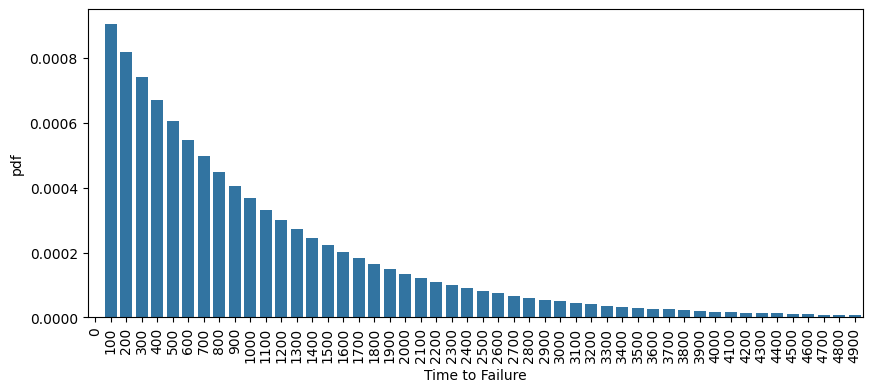

In [27]:
pdf_df = pd.DataFrame({'success': range(0, 5000, 100),'pdf': list(stats.expon.pdf(range(0, 5000, 100),loc = 1/1000,scale = 1000))})
																								   
plt.figure(figsize=(10,4))
sns.barplot(x=pdf_df.success, y = pdf_df.pdf)
plt.xticks(rotation = 90)
plt.xlabel('Time to Failure')

# Hypothesis Testing

## 1. Z-Test

In this case, the population mean (claim made by passport office) and standard deviation are known. Population mean is 30 and population standard deviation is 12.5. The dataset in passport.csv contains observations of actual processing time of 40 passports. We can calculate the mean of these observations and calculate Z-statistics. If the Z-statistics value is more than –1.64 (Z-critical value for left-tailed test), then it will be concluded that the processing time is not less than 30, but higher. And if the Z-statistic is less than –1.64, then it can be concluded that the processing time is less than 30 as claimed by passport office.

In [8]:
 data= {"processing_time": [
        28, 34, 31, 29, 36, 27, 30, 33, 35, 26,
        32, 29, 38, 24, 31, 34, 28, 37, 30, 29,
        35, 27, 33, 26, 39, 28, 31, 34, 30, 25,
        36, 29, 32, 27, 34, 28, 31, 33, 26, 35
    ]
}
passport_df=pd.DataFrame(data)
passport_df.head()

,processing_time
0,28
1,34
2,31
3,29
4,36


In [9]:
import math

def z_test(pop_mean, pop_std, sample):
	z_score = (sample.mean() - pop_mean)/(pop_std/math.sqrt(len(sample)))
	return z_score, stats.norm.cdf(z_score)

In [12]:
z_test(30, 12.5, passport_df.processing_time)

(0.5059644256269407, 0.6935591882933818)

it is not less than -1.64 so processing time is not less than 30 days   
null hypothesis is correct that    
H0 : u ≥ 30

# One sample T-test

In this case, the population mean is 500 and the sample set for actual production cost is available in the file bollywoodmovies.csv. The population standard deviation is also not known. To compare if the average cost of the samples is equal to the 500 or not, we can conduct a one-sample t-test using scipy.stats.ttest_1samp().

In [21]:
 datab={"production_cost": [
        300, 320, 340, 360, 380,
        400, 420, 440, 460, 480,
        500, 520, 540, 560, 580,
        600, 310, 330, 350, 370,
        390, 410, 430, 450, 470,
        490, 510, 530, 550, 570,
        590, 305, 345, 385, 425,
        465, 505, 545, 585, 595
    ]
}

In [22]:
bollywood_df = pd.DataFrame(datab)
bollywood_df.head()

,production_cost
0,300
1,320
2,340
3,360
4,380


Null hypothesis is the sample mean equals 500 and alternate hypothesis is the sample mean does not equal 500.

$$
H_0: \mu = 500 \\ H_A: \mu ≠ 500
$$

In [23]:
stats.ttest_1samp(bollywood_df.production_cost, 500)

TtestResult(statistic=-3.227344810950888, pvalue=0.0025333568199828135, df=39)

This returns -3.227344810950888 value for t-statistics and 0.0025333 for p-value. This implies the sample mean is less than (to the left of) population mean and has only 2.7% probability of being part of the distribution with a population mean of 500. As 
p-value is less than 0.05, we can conclude that the sample mean rejects that the production cost is equal to 500.

# Two Sample T-test

A company claims that children (in the age group between 7 and 12) who drink their
(the company’s) health drink will grow taller than the children who do not drink the health drink. Data in the file healthdrink.xlsx shows the average increase in height over a one-year period from two groups: one drinking the health drink and the other not drinking the health drink. At 𝛼 = 0.05, test whether the increase in height for the children who drink the health drink is different from those who do not drink the health drink.

Solution: 

In this case, the population mean and standard deviation are not known. We have
only two samples. One sample has observations of an increase in height for the group drinking the health drink, and the other sample has observations of an increase in height for the group not drinking the health drink. We can read both the samples and conduct a
two-sample t-test using scipy.stats.ttest_ind(). If the method returns a p-value less than 0.05, then the increase in height can be concluded to be different.

The file healthdrink.xlsx contains two tabs healthdrink_yes and healthdrink_no, which
include the respective samples.

```python
healthdrink_yes = pd.read_excel('healthdrink.xlsx', 'healthdrink_yes')
healthdrink_yes.head()
```

![Screenshot 2025-09-18 at 7.36.30 PM.png](attachment:5870466b-4f7f-45d1-b325-2387ffb14f4f:Screenshot_2025-09-18_at_7.36.30_PM.png)

Now read the data from the tab healthdrink_no in healthdrink.xlsx and display !rst 5 records.

```python
healthdrink_no = pd.read_excel('healthdrink.xlsx', healthdrink_no')
healthdrink_no.head()
```

![Screenshot 2025-09-18 at 7.44.40 PM.png](attachment:f3694e5e-8479-4c82-93a5-4d89c4cf3ee5:Screenshot_2025-09-18_at_7.44.40_PM.png)

We use the following code to display the distribution plots of the increase in height separately for the drinking health drink and the non-drinking health drink groups.

```python
sns.distplot(healthdrink_yes['height_increase'], label = 'healthdrink_yes')
sns.distplot(healthdrink_no['height_increase'], label = 'healthdrink_no')
plt.legend()
```

![Screenshot 2025-09-18 at 8.00.22 PM.png](attachment:bad212c3-dd5a-4b08-81da-fa4ace5ea634:Screenshot_2025-09-18_at_8.00.22_PM.png)

We can observe from the above graph that the distribution of the increase in height for those who have the health drink has shifted to the right of those who did not have the health drink. But is the difference, as claimed, statistically significant?

The scipy.stats.ttest_ind() method takes two independent samples and returns the test
statistics.

```python
scipy.stats.ttest_ind(healthdrink_yes['height_increase'], healthdrink_no['height_increase'])
```

Ttest_indResult(statistic=8.1316, p-value=0.00)

The scipy.stats.ttest_ind() method takes two independent samples and returns the test
statistics.

The probability of the samples belonging to the same distribution is almost 0. This means that the increase in height for those who had the health drink is significantly different than those who did not.

# Paired Sample T-test 

The file breakups.csv contains alcohol consumption before and after a breakup. Conduct a paired t-test to check whether the alcohol consumption is more after the breakup at 95% confidence (𝛼 = 0.05).

In [30]:
databr = {
    "Before_Breakup": [
         7, 8, 6, 7, 9, 6, 8, 7, 6, 7,
        8, 7, 6, 8, 7, 6, 9, 7, 8, 6
    ],
    "After_Breakup": [
       7, 9, 6, 7, 9, 7, 8, 7, 7, 7,
        8, 6, 6, 8, 7, 6, 9, 8, 7, 6
    ]
}


In [31]:
breakup_df = pd.DataFrame(databr)
breakup_df.head()

,Before_Breakup,After_Breakup
0,7,7
1,8,9
2,6,6
3,7,7
4,9,9


C:\Users\Abhishek-PC\AppData\Local\Temp\ipykernel_10664\364667750.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(breakup_df.Before_Breakup, label = "Before Breakup")
C:\Users\Abhishek-PC\AppData\Local\Temp\ipykernel_10664\364667750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(breakup

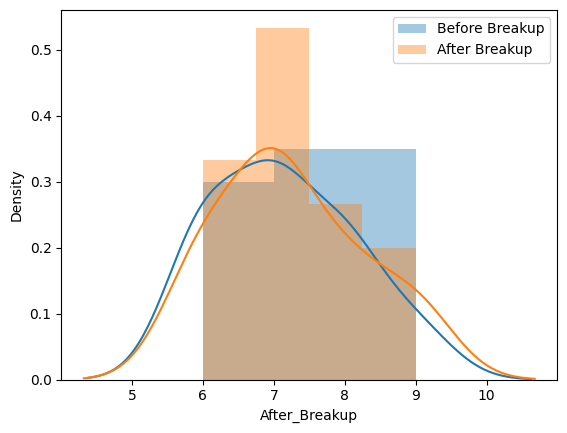

In [32]:
sns.distplot(breakup_df.Before_Breakup, label = "Before Breakup")
sns.distplot(breakup_df.After_Breakup, label = "After Breakup")
plt.legend()

The figure above shows that the distribution of drinking habits before and after breakups is very similar. We can use a paired t-test to confirm this. scipy.stats.ttest_rel is used to conduct the paired sample t-test. It takes both related samples as parameters.

In [33]:
stats.ttest_rel(breakup_df['Before_Breakup'], breakup_df['After_Breakup'])

TtestResult(statistic=-0.8094272134003796, pvalue=0.4282902958592564, df=19)

As the p-value is 0.42829, which is more than the 0.05 value, we conclude that they are part of the same distribution. There is no change in alcohol consumption pattern before and after the breakup.

# Chi-Square Goodness of Fit Test

Hanuman Airlines (HA) operated daily flights to several Indian cities. One of the problems HA faces is the food preferences of the passengers. Captain Cook, the operations manager of HA, believes that 35% of their passengers prefer vegetarian food, 40% prefer non-vegetarian food, 20% prefer low-calorie food, and 5% request diabetic food. A sample of 500 passengers was chosen to analyse the food preferences, and the observed frequencies are as follows:

1. Vegetarian: 190
2. Non-Vegetarian: 185
3. Low Calorie: 90
4. Diabetic: 35

Conduct a chi-square test to check whether Captain Cook’s belief is true at 𝛼 = 0.05.

The scipy.stats.chisquare method is used for the chi-square test. It takes the following parameters:

1. f_obs : array_like − Observed frequencies in each category.
2. f_exp : array_like − Expected frequencies in each category.

In [34]:
f_obs = [190, 185, 90, 35]
f_exp = [500*0.35, 500*0.4, 500*.2, 500*0.05]
print(f_exp)

[175.0, 200.0, 100.0, 25.0]


In [35]:
stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=7.410714285714286, pvalue=0.05989751420084909)

As the p-value is more than 0.05, we retain the null hypothesis (original claim), that is,
Captain Cook’s belief is true.

# ANOVA 

Ms Rachael Khanna, the brand manager of ENZO detergent powder at the “one-stop” retail, was interested in understanding whether the price discounts have any impact on the sales quantity of ENZO. To test whether the price discounts had any impact, price discounts of 0% (no discount), 10%, and 20% were given on randomly selected days. The quantity (in kg) of ENZO sold in a day under different discount levels is shown below. Conduct a one-way ANOVA to check whether the discount had any significant impact on the average sales quantity at 𝛼 = 0.05.

In [37]:
discount_sales_data = {
    "discount_0": [
        39, 32, 25, 25, 37, 28, 26, 26, 40, 29,
        37, 34, 28, 36, 38, 38, 34, 31, 39, 36,
        34, 25, 33, 26, 33, 26, 26, 27, 32, 40
    ],

    "discount_10": [
        34, 41, 45, 39, 38, 33, 35, 41, 47, 34,
        47, 44, 46, 38, 42, 33, 37, 45, 38, 44,
        38, 35, 34, 34, 37, 39, 34, 34, 36, 41
    ],

    "discount_20": [
        42, 43, 44, 46, 41, 52, 43, 42, 50, 41,
        41, 47, 55, 55, 47, 48, 41, 42, 45, 48,
        40, 50, 52, 43, 47, 55, 49, 46, 55, 42
    ]
}

In [38]:
onestop_df=pd.DataFrame(discount_sales_data)
onestop_df

,discount_0,discount_10,discount_20
0,39,34,42
1,32,41,43
2,25,45,44
3,25,39,46
4,37,38,41
5,28,33,52
6,26,35,43
7,26,41,42
8,40,47,50
9,29,34,41


C:\Users\Abhishek-PC\AppData\Local\Temp\ipykernel_10664\4183767014.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(onestop_df['discount_0'], label = 'No Discount')
C:\Users\Abhishek-PC\AppData\Local\Temp\ipykernel_10664\4183767014.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(onestop_d

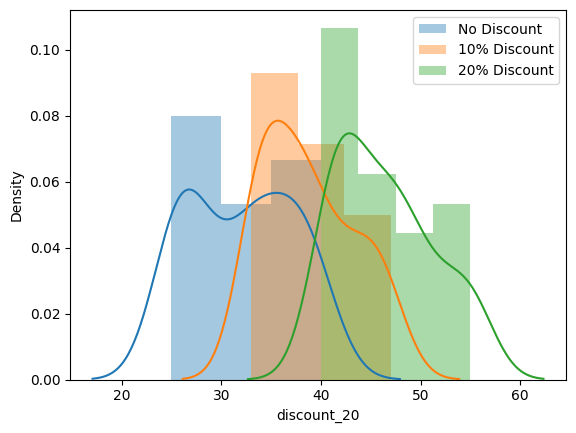

In [39]:
sns.distplot(onestop_df['discount_0'], label = 'No Discount')
sns.distplot(onestop_df['discount_10'], label = '10% Discount')
sns.distplot(onestop_df['discount_20'], label = '20% Discount')
plt.legend()

In [40]:
from scipy.stats import f_oneway

f_oneway(onestop_df['discount_0'], onestop_df['discount_10'], onestop_df['discount_20'])

F_onewayResult(statistic=65.86986401283694, pvalue=3.82150066972564e-18)

In [42]:
stats.f_oneway(onestop_df['discount_0'], onestop_df['discount_10'], onestop_df['discount_20'])

F_onewayResult(statistic=65.86986401283694, pvalue=3.82150066972564e-18)

As p-value is less than 0.05, we reject the null hypothesis and conclude that the mean sales quantity values under different discounts are different.